In [ ]:
import google.generativeai as genai
from IPython.display import HTML, Markdown, display


GOOGLE_API_KEY = "GEMINI KEY"
genai.configure(api_key=GOOGLE_API_KEY)

In [2]:
for model in genai.list_models():
  if 'embedContent' in model.supported_generation_methods:
    print(model.name)

models/embedding-001
models/text-embedding-004
models/gemini-embedding-exp-03-07
models/gemini-embedding-exp


In [3]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]


response = genai.embed_content(model='models/text-embedding-004',
                               content=texts,
                               task_type='semantic_similarity')

In [4]:
def truncate(t: str, limit: int = 50) -> str:
  """Truncate labels to fit on the chart."""
  if len(t) > limit:
    return t[:limit-3] + '...'
  else:
    return t

truncated_texts = [truncate(t) for t in texts]

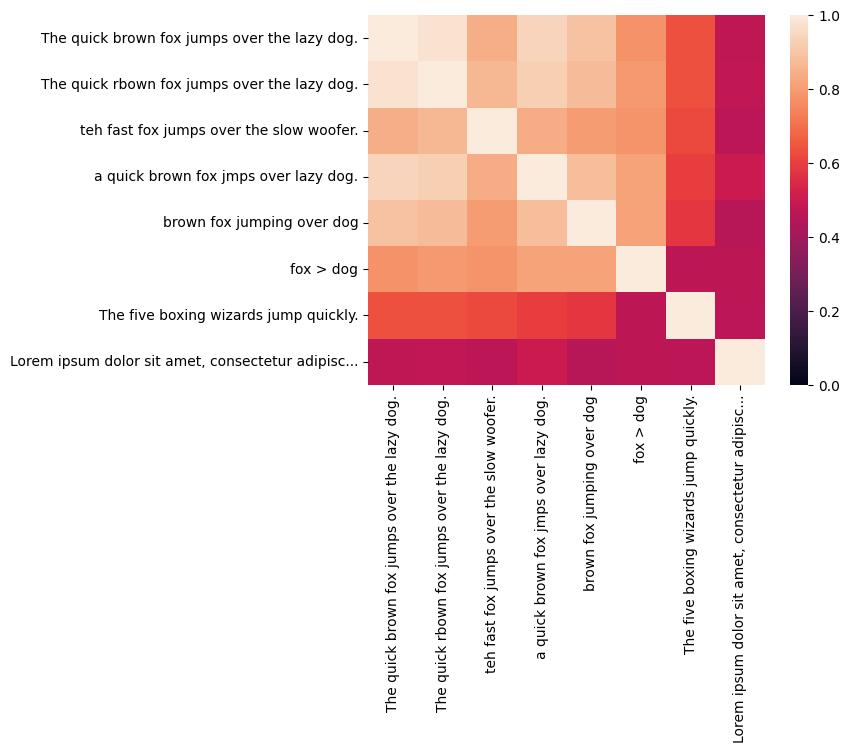

In [5]:
import pandas as pd
import seaborn as sns


# Set up the embeddings in a dataframe.
df = pd.DataFrame(response['embedding'], index=truncated_texts)
# Perform the similarity calculation
sim = df @ df.T
# Draw!
sns.heatmap(sim, vmin=0, vmax=1);

In [6]:
sim['The quick brown fox jumps over the lazy dog.'].sort_values(ascending=False)

The quick brown fox jumps over the lazy dog.          0.999999
The quick rbown fox jumps over the lazy dog.          0.975623
a quick brown fox jmps over lazy dog.                 0.939730
brown fox jumping over dog                            0.894507
teh fast fox jumps over the slow woofer.              0.842152
fox > dog                                             0.776455
The five boxing wizards jump quickly.                 0.635346
Lorem ipsum dolor sit amet, consectetur adipisc...    0.472174
Name: The quick brown fox jumps over the lazy dog., dtype: float64